In [1]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 6.5 MB 41.1 MB/s 
     |████████████████████████████████| 895 kB 46.4 MB/s 
     |████████████████████████████████| 596 kB 49.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
#사전학습 모델을 이용해 추론만 하므로 학습과정이 없다
import numpy as np
import pandas as pd

from transformers import pipeline,AutoTokenizer
from tqdm import tqdm

In [3]:
from google.colab import drive
drive.mount('/content/gdriv')

Mounted at /content/gdriv


In [4]:
from pathlib import Path
import json
def read_squad(path):
    path = Path(path)
    with open(path, 'rb') as f:
        squad_dict = json.load(f)

    contexts = []
    questions = []
    answers = []
    for group in squad_dict['data']:
        for passage in group['paragraphs']:
            context = passage['context']
            for qa in passage['qas']:
                question = qa['question']
                for answer in qa['answers']:
                    contexts.append(context)
                    questions.append(question)
                    answers.append({"answer_start":[answer["answer_start"]],"text":[answer["text"]]})

    return contexts, questions, answers

In [5]:

file_path =  '/content/gdriv/My Drive/Colab Notebooks/구름 자연어처리 과정/프로젝트/QA/Data/train.json'

contexts, questions, answers = read_squad(file_path)
df = pd.DataFrame(list(zip(answers, contexts, questions)),
               columns =['answers', 'context','question'])
df

,answers,context,question
0,"{'answer_start': [478], 'text': ['한 달가량']}",올여름 장마가 17일 제주도에서 시작됐다. 서울 등 중부지방은 예년보다 사나흘 정도...,북태평양 기단과 오호츠크해 기단이 만나 국내에 머무르는 기간은?
1,"{'answer_start': [478], 'text': ['한 달']}",올여름 장마가 17일 제주도에서 시작됐다. 서울 등 중부지방은 예년보다 사나흘 정도...,북태평양 기단과 오호츠크해 기단이 만나 국내에 머무르는 기간은?
2,"{'answer_start': [1422], 'text': ['삼보테크놀로지']}",부산시와 (재)부산정보산업진흥원(원장 이인숙)이 ‘2020~2021년 지역SW서비스...,지능형 생산자동화 기반기술을 개발중인 스타트업은?
3,"{'answer_start': [107], 'text': ['와쿠이 히데아키']}",시범 경기에서는 16이닝을 던져 15실점을 기록하는 등 성적이 좋지 않았지만 본인으...,개막전에서 3안타 2실점을 기록해서 패한 선수는?
4,"{'answer_start': [408], 'text': ['‘교동반점 짬뽕’']}",유명 맛집 이름을 달고 나온 편의점 자체상표(PB) 라면이 인기를 끌고 있다. ‘검...,컵라면 매출에서 불닭볶음면을 이긴 상품은?
...,...,...,...
17658,"{'answer_start': [170], 'text': ['‘혹성탈출: 반격의 서...",유인원 무리의 리더 시저는 인간 건축가 말콤(제이슨 클락)에게 작별 인사를 한다. ...,혹성탈출의 두 번째 프리퀄의 제목은?
17659,"{'answer_start': [171], 'text': ['혹성탈출: 반격의 서막']}",유인원 무리의 리더 시저는 인간 건축가 말콤(제이슨 클락)에게 작별 인사를 한다. ...,혹성탈출의 두 번째 프리퀄의 제목은?
17660,"{'answer_start': [197], 'text': ['8시 10분']}",ASUS(에이수스) 그래픽카드 공식수입사 인텍앤컴퍼니(대표 서정욱)는 10월 16일...,인택엔컴퍼니가 실시하는 추첨판매 신청 마감시간은?
17661,"{'answer_start': [276], 'text': ['28개']}",한국인 최초로 쇼팽국제피아노콩쿠르에서 우승을 차지한 ‘21세 쇼팽’ 조성진 마케팅이...,유니버셜뮤직과 협력하여 만든 메가기프트를 살 수 있는 업체의 매장 수는?


In [43]:
qa_model = pipeline("question-answering", model="mrm8488/bert-multi-cased-finetuned-xquadv1",tokenizer="mrm8488/bert-multi-cased-finetuned-xquadv1")

Downloading:   0%|          | 0.00/657 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/679M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [55]:
x=3
print(df.context[x])
print(df.question[x])
context=df.context[x]
question=df.question[x]

시범 경기에서는 16이닝을 던져 15실점을 기록하는 등 성적이 좋지 않았지만 본인으로서는 처음으로 개막전 선발 투수로 지명되었다. 요코하마 고등학교의 후배이기도 한 사이타마 세이부 라이온스의 와쿠이 히데아키도 개막전 선발로 등판해 5이닝까지 노히트로 처리하였지만 7회에 2점 홈런을 허용하면서 역전당했다. 타선에서도 1점을 따는데만 그쳐 3안타 2실점을 기록하여 패전 투수가 되었다. 그 외에도 다르빗슈 유, 이와쿠마 히사시도 개막전 선발 투수로서 등판하였지만 모두 패전 투수가 되었기 때문에 개막전 투수가 3명 모두 완투패를 당한 것이어서 50년 만에 일본 프로 야구에서의 진기록이 나왔다.

정규 시즌에서는 팀내 최다인 13승을 올려 203.2 이닝의 완투 7개, 무볼넷 경기 4차례, 탈삼진 192개, WHIP은 1.02의 좋은 성적을 남겼다. 그러나 피홈런 개수가 증가되면서 29개가 나와 11패를 기록했다. 오릭스 버펄로스 전에서는 7전 7승이라는 기대 이상의 성적을 나타냈고 최종전에서도 승리해 팀을 클라이맥스 시리즈 진출에 기여했다.

클라이맥스 시리즈 파이널 스테이지에서는 후쿠오카 소프트뱅크 호크스와 상대하면서 시즌에서는 평균자책점이 3.32였지만 0승 4패라는 최악의 성적을 남겼다. 그러나 퍼스트 스테이지 1차전(세이부전, 7과 0/3이닝, 2실점)에서 1실점 완투 승리를 거뒀고 최종전인 6차전에서도 4개의 피안타와 완봉 승리를 거두는 등 클라이맥스 시리즈 사상 시즌 3위였던 팀이 처음으로 일본 시리즈 진출에 기여하여 자신도 파이널 스테이지 MVP에 선정되었다. 일본 시리즈에서도 1차전과 6차전에 선발 등판해 1차전에서는 2실점 호투하여 승리해 자신으로서는 처음으로 일본 시리즈의 승리 투수가 되었다.
개막전에서 3안타 2실점을 기록해서 패한 선수는?


In [60]:
result = qa_model(question=question, context=context)
print("Answer:", result['answer'])
print("Score:", result['score'])
print('True:',df.answers[x]['text'])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:301: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


Answer: 와쿠이 히데아키도
Score: 0.7236843109130859
True: ['와쿠이 히데아키']


허깅페이스 모델 검색할 때 'multi'검색하고 QA task로 가중치 훈련시킨 모델만 보도록 필터링 시키면 여러 모델 나옵니다.

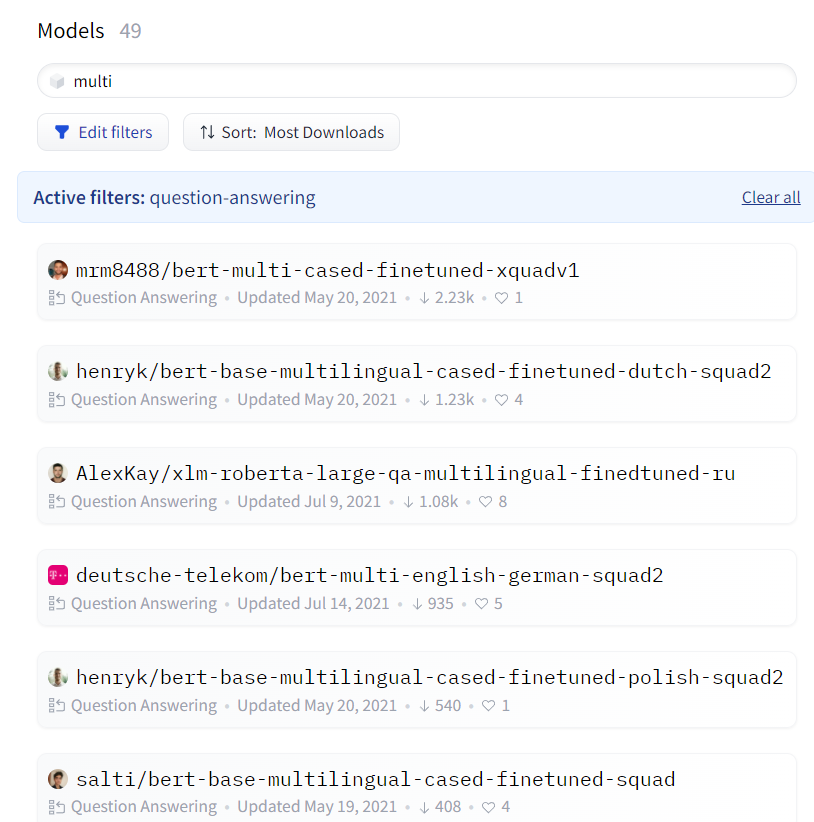